In [1]:
# import os
# os.system("pip uninstall pycocotools -y")
# os.system("python3 -m pip install git+'https://github.com/Cufix/tinycocoapi.git#egg=pycocotools&subdirectory=PythonAPI'")

In [2]:
import json
import os
import warnings
warnings.filterwarnings(action='ignore')

from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

In [3]:
import pycocotools
pycocotools.__path__

['/home/kos/anaconda3/envs/PhD/lib/python3.8/site-packages/pycocotools']

In [4]:
# glob("debug-errors/**/results-*.json", recursive=True)

In [15]:
# th = 0.2
th = 0.01

subdirs = [
    'after-ZF-changes/roi-track-p10-d0-letterbox',
    'after-ZF-changes/track-p10-d0-letterbox',
    'after-ZF-changes/roi-p10-d7-letterbox',
    'after-ZF-changes/roi-p10-d0-letterbox',
    
    # 'after-ZF-changes/roi-p10-d0-letterbox'
    # 'after-ZF-changes/roi-track-p10-d7-letterbox-bintrk',
]

all_metrics = []
for subdir in subdirs:
    detections = [
        # f'debug-errors/{subdir}/Zebra/results-val.json',
        # f'debug-errors/{subdir}/SDS/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-crops/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-crops-mul-scales/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-crops-mul-scales-100/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-unet-masks0-crops-mul-scales/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-unet-masks1-crops-mul-scales/results-test_dev.json',
        # f'debug-errors/{subdir}/SDS-unet-masks2-crops-mul-scales/results-test_dev.json',
        # f'debug-errors/{subdir}/DC/results-test_minus_val.json',
        # f'debug-errors/{subdir}/DC-crops/results-test_minus_val.json'
        f'debug-errors/{subdir}/DC-crops-noresize-debug/results-test_minus_val.json',
        f'debug-errors/{subdir}/DC-crops-noresize/results-test_minus_val.json',
        f'debug-errors/{subdir}/DC-noresize/results-test_minus_val.json',     
    ]


    gts = [
        # 'data/3DZeF20/val.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        # 'data/SeaDronesSee/test_dev.json',
        'data/DroneCrowd/test_minus_val.json',
        'data/DroneCrowd/test_minus_val.json',
        'data/DroneCrowd/test_minus_val.json',
        # # 'test.json',
        # 'test.json',
    ]


    # names = ['method', 'dataset', 'AP', 'AP50', 'AP75', 'APu', 'APvt', 'APt', 'APs', 'APm', 'APl', 'AR1', 'AR10', 'AR100', 'ARu', 'ARvt', 'ARt', 'ARs', 'ARm', 'ARl']
    names = ['method', 'dataset', 'AP', 'AP50', 'AP75', 'APu', 'APvt', 'APt', 'APs', 'APm', 'APl', 'AR500', 'ARu', 'ARvt', 'ARt', 'ARs', 'ARm', 'ARl']
    # max_dets = [1,10,100]
    # iou_th = None #0.5
    max_dets = [500]
    iou_th = 0.5

    
    for det_path, gt_path in zip(detections, gts):
        if not os.path.isfile(det_path):
            print(det_path)
            continue
            
        # if 'DC' not in det_path:
        #     continue
            
        
            
        det = json.load(open(det_path))
        print(len(det))
        det = [x for x in det if x['score'] >= th] if th is not None else det
        print(len(det))
        print(max_dets, iou_th)
        
        th_path = det_path.replace('.json', f'-mapped.json')
        with open(th_path, 'w', encoding='utf-8') as f:
            json.dump(det, f, ensure_ascii=False, indent=4)
    
        method, ds = os.path.dirname(det_path).split(os.sep)[-2:]
        anno = COCO(gt_path)

        pred = anno.loadRes(th_path)  # init predictions api
        
        eval = COCOeval(anno, pred, 'bbox', iouThr=iou_th, maxDets=max_dets)
        # eval = COCOeval(anno, pred, 'bbox', , 0.5) #) #, [500], 0.5)
        # eval = COCOeval(anno, pred, 'bbox')

        imgIds = sorted(anno.getImgIds())
        eval.params.imgIds = imgIds

        eval.evaluate()
        eval.accumulate()
        eval.summarize()
        map, map50 = eval.stats[:2]

        stats = {k:v for k,v in zip(names, [method, ds] + [x*100 for x in eval.stats.tolist()])}
        all_metrics.append(stats)

metrics = pd.DataFrame(all_metrics)
metrics.to_csv(f'debug-errors/{subdir}-metrics-DC-noresize.csv', index=False)

debug-errors/after-ZF-changes/roi-track-p10-d0-letterbox/DC-crops-noresize-debug/results-test_minus_val.json
2593791
2593791
[500] 0.5
loading annotations into memory...
Done (t=2.96s)
creating index...
index created!
Loading and preparing results...
DONE (t=2404.18s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=7568.86s).
Accumulating evaluation results...
DONE (t=20.89s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=500 ] = 0.224
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=500 ] = 0.536
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=500 ] = 0.142
 Average Precision  (AP) @[ IoU=0.50      | area= micro | maxDets=500 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50      | area=v-tiny | maxDets=500 ] = 0.538
 Average Precision  (AP) @[ IoU=0.50      | area=  tiny | maxDets=500 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50      | area= small | maxDets=500 ] = -1.000
 

OSError: [Errno 28] No space left on device

In [16]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR500,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,DC-crops-noresize-debug,22.166390,53.174795,14.206655,-100.0,53.375798,49.961781,-100.0,-100.0,-100.0,71.032491,-100.0,71.130487,72.723281,-100.0,-100.0,-100.0
1,roi-p10-d7-letterbox,DC-crops-noresize,22.553957,53.692636,14.552609,-100.0,53.882647,50.934901,-100.0,-100.0,-100.0,72.699583,-100.0,72.759075,74.800211,-100.0,-100.0,-100.0


In [11]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,SDS,48.552445,81.087061,50.283044,-100.0,28.554778,46.334300,57.363699,33.588121,69.242939,25.057712,58.044441,58.063227,-100.0,35.063974,59.075447,67.192661,39.123911,75.234176
1,roi-p10-d7-letterbox,SDS-crops,46.609705,82.705995,45.865037,-100.0,30.034673,43.294740,54.585127,33.195957,66.641826,24.179847,56.729774,56.744079,-100.0,35.281411,56.026487,64.988313,40.239003,72.147742
2,roi-p10-d7-letterbox,SDS-crops-mul-scales,50.435689,83.895313,53.852430,-100.0,33.193982,46.775805,59.156317,39.464071,65.143533,25.996178,59.255796,59.265486,-100.0,39.907727,57.977685,67.233396,44.374059,67.600588
3,roi-p10-d7-letterbox,SDS-crops-mul-scales-100,50.684313,83.934175,53.825437,-100.0,35.259204,46.653868,58.808461,39.269928,66.335724,26.337025,59.639735,59.644283,-100.0,41.570463,58.233914,67.018156,44.867056,69.690283
4,roi-p10-d7-letterbox,SDS-unet-masks0-crops-mul-scales,49.784109,83.059951,53.067574,-100.0,31.895610,46.505849,59.274741,38.805003,54.579412,25.592963,58.557418,58.572250,-100.0,38.335537,57.350219,67.036377,44.365004,58.213661
5,roi-p10-d7-letterbox,SDS-unet-masks1-crops-mul-scales,50.337694,84.245216,53.331553,-100.0,33.150774,47.290304,59.364464,39.193502,57.273368,26.217606,59.822974,59.832269,-100.0,40.256222,59.088019,67.426950,44.296477,60.521231
6,roi-p10-d7-letterbox,SDS-unet-masks2-crops-mul-scales,50.441395,84.190964,53.557733,-100.0,33.333091,47.345187,59.634763,38.081151,54.058443,26.161293,59.807445,59.822474,-100.0,40.472444,59.090728,67.668472,43.693686,57.483302
7,roi-p10-d0-letterbox,SDS-unet-masks0-crops-mul-scales,49.864752,82.748363,53.368565,-100.0,31.854757,46.406452,59.358112,38.242851,51.112590,25.725984,58.617137,58.630585,-100.0,38.349968,57.633227,67.106282,44.361889,52.997376
8,roi-p10-d0-letterbox,SDS-unet-masks1-crops-mul-scales,50.151127,83.895834,53.239271,-100.0,32.748319,47.477729,59.211240,39.027048,56.016858,26.149267,59.680764,59.687092,-100.0,39.789297,59.596488,67.255348,44.212993,57.958810
9,roi-p10-d0-letterbox,SDS-unet-masks2-crops-mul-scales,50.211331,83.841825,53.150406,-100.0,32.834726,47.541023,59.455477,37.995594,51.531177,26.147969,59.662207,59.675457,-100.0,40.029457,59.485150,67.414323,43.876075,55.197201


In [21]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,SDS,48.552445,81.087061,50.283044,-100.0,28.554778,46.334300,57.363699,33.588121,69.242939,25.057712,58.044441,58.063227,-100.0,35.063974,59.075447,67.192661,39.123911,75.234176
1,roi-p10-d7-letterbox,SDS-crops,46.609705,82.705995,45.865037,-100.0,30.034673,43.294740,54.585127,33.195957,66.641826,24.179847,56.729774,56.744079,-100.0,35.281411,56.026487,64.988313,40.239003,72.147742
2,roi-p10-d7-letterbox,SDS-crops-mul-scales,50.435689,83.895313,53.852430,-100.0,33.193982,46.775805,59.156317,39.464071,65.143533,25.996178,59.255796,59.265486,-100.0,39.907727,57.977685,67.233396,44.374059,67.600588
3,roi-p10-d0-letterbox,SDS-unet-masks0-crops-mul-scales,49.864752,82.748363,53.368565,-100.0,31.854757,46.406452,59.358112,38.242851,51.112590,25.725984,58.617137,58.630585,-100.0,38.349968,57.633227,67.106282,44.361889,52.997376
4,roi-p10-d0-letterbox,SDS-unet-masks1-crops-mul-scales,50.151127,83.895834,53.239271,-100.0,32.748319,47.477729,59.211240,39.027048,56.016858,26.149267,59.680764,59.687092,-100.0,39.789297,59.596488,67.255348,44.212993,57.958810
5,roi-p10-d0-letterbox,SDS-unet-masks2-crops-mul-scales,50.211331,83.841825,53.150406,-100.0,32.834726,47.541023,59.455477,37.995594,51.531177,26.147969,59.662207,59.675457,-100.0,40.029457,59.485150,67.414323,43.876075,55.197201


In [9]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,SDS,48.552445,81.087061,50.283044,-100.0,28.554778,46.334300,57.363699,33.588121,69.242939,25.057712,58.044441,58.063227,-100.0,35.063974,59.075447,67.192661,39.123911,75.234176
1,roi-p10-d7-letterbox,SDS-crops,46.609705,82.705995,45.865037,-100.0,30.034673,43.294740,54.585127,33.195957,66.641826,24.179847,56.729774,56.744079,-100.0,35.281411,56.026487,64.988313,40.239003,72.147742
2,roi-p10-d7-letterbox,SDS-crops-mul-scales,50.435689,83.895313,53.852430,-100.0,33.193982,46.775805,59.156317,39.464071,65.143533,25.996178,59.255796,59.265486,-100.0,39.907727,57.977685,67.233396,44.374059,67.600588


In [14]:
newest = metrics[metrics.dataset=='SDS-crops-mul-scales']
newest = newest[[x for x in newest.columns if x not in ['method', 'dataset']]]
newest

,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
2,50.435689,83.895313,53.85243,-100.0,33.193982,46.775805,59.156317,39.464071,65.143533,25.996178,59.255796,59.265486,-100.0,39.907727,57.977685,67.233396,44.374059,67.600588


In [15]:
newest.to_csv('SDS-test-roi_SDS_yolo_mulscales_p10_d7_letterbox.csv', index=False)


In [3]:
metrics = pd.read_csv('debug-errors/after-ZF-changes/roi-p10-d0-letterbox-metrics-SDS-compare-th50.csv')
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,SDS,48.552445,81.087061,50.283044,-100.0,61.385482,83.307335,89.402867,63.141297,97.936875,37.382257,87.036569,87.072165,-100.0,67.558103,90.236766,94.594538,65.472425,98.091603
1,roi-p10-d7-letterbox,SDS-crops,46.609705,82.705995,45.865037,-100.0,67.901907,83.584520,90.703686,65.559848,98.501368,38.127216,88.212494,88.241500,-100.0,71.669817,91.126308,95.837441,69.457495,98.854962
2,roi-p10-d7-letterbox,SDS-crops-mul-scales,50.435689,83.895313,53.852430,-100.0,71.683339,84.332549,91.891449,72.682796,94.554455,38.583905,88.529293,88.549068,-100.0,76.652129,90.509336,95.457946,74.485252,94.847328
3,roi-p10-d7-letterbox,SDS-crops-mul-scales-100,50.684313,83.934175,53.825437,-100.0,74.192859,83.466994,91.839344,73.231172,95.542492,38.506772,89.083876,89.091786,-100.0,78.017155,90.592254,95.698709,76.416994,95.801527
4,roi-p10-d0-letterbox,SDS-unet-masks0-crops-mul-scales,49.864752,82.748363,53.368565,-100.0,68.355539,82.979976,92.198030,70.688887,74.202420,38.381405,87.384251,87.413914,-100.0,74.032228,88.950598,95.400229,75.099908,75.954198
5,roi-p10-d0-letterbox,SDS-unet-masks1-crops-mul-scales,50.151127,83.895834,53.239271,-100.0,70.507876,85.053590,91.839577,72.057179,86.509218,39.103604,88.974324,88.988167,-100.0,76.015228,91.829934,95.223796,74.428721,87.404580
6,roi-p10-d0-letterbox,SDS-unet-masks2-crops-mul-scales,50.211331,83.841825,53.150406,-100.0,69.886657,85.062195,91.997535,70.476159,77.426292,38.952424,88.877496,88.903204,-100.0,76.012177,91.786329,95.380457,74.244178,81.870229


In [12]:
out_dir = './debug-errors'
# os.makedirs(out_dir, exist_ok=True)

for i in range(len(metrics)):
    single_res = metrics.iloc[i]
    print(single_res)
    cols = [x for x in metrics.columns.tolist() if x not in ['method', 'dataset']]
    ds, method = single_res.dataset, single_res.method
    single_res = pd.DataFrame(single_res[cols])
    single_res.T.to_csv(f'{out_dir}/{ds}-test-{method}.csv', index=False, header=cols)

method        roi-p10-d7-letterbox
dataset    DC-crops-noresize-debug
AP                        22.16639
AP50                     53.174795
AP75                     14.206655
APu                         -100.0
APvt                     53.375798
APt                      49.961781
APs                         -100.0
APm                         -100.0
APl                         -100.0
AR500                    71.032491
ARu                         -100.0
ARvt                     71.130487
ARt                      72.723281
ARs                         -100.0
ARm                         -100.0
ARl                         -100.0
Name: 0, dtype: object
method     roi-p10-d7-letterbox
dataset       DC-crops-noresize
AP                    22.553957
AP50                  53.692636
AP75                  14.552609
APu                      -100.0
APvt                  53.882647
APt                   50.934901
APs                      -100.0
APm                      -100.0
APl                      -1

In [5]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR500,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,DC,18.106292,46.901137,9.365652,-100.0,51.418277,17.384837,-100.0,-100.0,-100.0,63.410094,-100.0,63.348672,73.794678,-100.0,-100.0,-100.0
1,roi-p10-d7-letterbox,DC-crops,18.788554,46.923854,11.185922,-100.0,51.337165,14.556336,-100.0,-100.0,-100.0,66.145263,-100.0,66.207111,70.852727,-100.0,-100.0,-100.0
2,roi-track-p10-d7-letterbox-bintrk,DC,18.121033,46.885960,9.219397,-100.0,51.456942,16.066772,-100.0,-100.0,-100.0,63.772211,-100.0,63.725927,73.351190,-100.0,-100.0,-100.0
3,roi-track-p10-d7-letterbox-bintrk,DC-crops,18.556481,45.863177,11.110620,-100.0,50.432097,13.975976,-100.0,-100.0,-100.0,64.692987,-100.0,64.712931,71.436726,-100.0,-100.0,-100.0


In [10]:
metrics

,method,dataset,AP,AP50,AP75,APu,APvt,APt,APs,APm,APl,AR1,AR10,AR100,ARu,ARvt,ARt,ARs,ARm,ARl
0,roi-p10-d7-letterbox,Zebra,75.988558,94.522719,85.227010,-100.0,0.000000,38.743867,71.360758,82.564220,-100.000000,30.391577,80.307844,80.308460,-100.0,0.000000,53.392405,76.981132,86.135498,-100.000000
1,roi-p10-d7-letterbox,SDS,48.552445,81.087061,50.283044,-100.0,28.554778,46.334300,57.363699,33.588121,69.242939,25.057712,58.044441,58.063227,-100.0,35.063974,59.075447,67.192661,39.123911,75.234176
2,roi-p10-d7-letterbox,SDS-crops,46.609705,82.705995,45.865037,-100.0,30.034673,43.294740,54.585127,33.195957,66.641826,24.179847,56.729774,56.744079,-100.0,35.281411,56.026487,64.988313,40.239003,72.147742
3,roi-track-p10-d7-letterbox-bintrk,Zebra,81.808269,97.430950,91.038278,-100.0,0.000000,44.435019,77.928490,87.701972,-100.000000,31.190124,85.084349,85.086812,-100.0,0.000000,52.632911,82.407090,90.446013,-100.000000
4,roi-track-p10-d7-letterbox-bintrk,SDS,48.747660,81.545048,50.435044,-100.0,28.315135,46.983011,57.403385,32.628042,62.818070,25.319970,58.295980,58.311801,-100.0,34.816170,60.189601,67.129683,37.557616,70.997535
5,roi-track-p10-d7-letterbox-bintrk,SDS-crops,46.794956,83.239202,45.894395,-100.0,30.316387,43.951971,54.430579,32.534959,63.078985,24.461542,57.046541,57.065724,-100.0,35.513111,56.953444,64.943200,39.471989,70.201177


In [21]:
csvs = glob(f'debug-errors/*csv')
csvs

['debug-errors/roi-track-fixes-resize-binary-trk-metrics.csv',
 'debug-errors/roi-fixes-resize-dilate-metrics.csv',
 'debug-errors/roi-metrics.csv',
 'debug-errors/roi-track-fixes-resize-binary-trk-padding-metrics.csv',
 'debug-errors/roi-fixes-resize-dilate-metrics-th02.csv',
 'debug-errors/roi-fixes-resize-metrics.csv',
 'debug-errors/roi-fixes-resize-metrics-th02.csv',
 'debug-errors/roi-track-fixes-resize-binary-trk-padding-metrics-th02.csv',
 'debug-errors/roi-track-fixes-resize-binary-trk-metrics-th02.csv']

In [22]:
out_dir = '/home/kos/projects/PhD/EAAI/csvs/metrics'
os.makedirs(out_dir, exist_ok=True)

for csv in csvs:
    df = pd.read_csv(csv)[names]
    for i in range(len(df)):
        single_res = df.iloc[i]
        print(single_res)
        cols = [x for x in df.columns.tolist() if x not in ['method', 'dataset']]
        ds, method = single_res.dataset, single_res.method
        if 'th02' in csv:
            method = f'{method}-th02'
        single_res = pd.DataFrame(single_res[cols])
        single_res.T.to_csv(f'{out_dir}/{ds}-test-{method}.csv', index=False, header=cols)

method     roi-track-fixes-resize-binary-trk
dataset                                Zebra
AP                                 69.513172
AP50                               95.536742
AP75                               75.396271
APu                                   -100.0
APvt                                     0.0
APt                                34.008918
APs                                 70.94298
APm                                71.972833
APl                                   -100.0
AR1                                28.944711
AR10                               75.945081
AR100                              76.102697
ARu                                   -100.0
ARvt                                     0.0
ARt                                47.670886
ARs                                75.943968
ARm                                78.076217
ARl                                   -100.0
Name: 0, dtype: object
method     roi-track-fixes-resize-binary-trk
dataset                         

## Archive

In [28]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,68.633912,92.724301,77.465436,0.000922,58.275363,70.708882,28.785276,76.295706,76.470552,2.340426,72.813990,77.862235
1,roi_track,73.178821,95.422710,84.198813,0.014378,63.105190,75.425218,29.225153,81.282822,81.647239,4.255319,77.034976,83.350421
2,track-backup,38.647307,47.195260,43.687858,0.000000,34.275715,39.442172,15.207362,40.661350,40.732515,0.000000,40.082141,41.092511
3,track-letterbox,72.494081,94.826237,82.645650,0.000703,63.633046,74.883387,29.113497,80.841718,81.196933,1.914894,76.687864,82.870645
4,track-sanity,73.033220,95.498121,83.350138,0.002976,64.637872,75.230254,29.161350,80.895706,81.173006,2.553191,76.796502,82.808170
5,track,73.033220,95.498121,83.350138,0.002976,64.637872,75.230254,29.161350,80.895706,81.173006,2.553191,76.796502,82.808170


In [11]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,69.213369,93.250764,77.788104,0.000747,58.766428,71.370493,28.855828,76.589571,76.757055,1.489362,73.036566,78.172207
1,roi_track,72.556062,95.240482,83.302624,0.004412,63.881664,74.721926,29.201840,81.007362,81.241104,2.978723,76.497085,82.977173


In [24]:
baseline = pd.DataFrame(json.load(open("tests/baseline_metrics.json")))[['method', 'AP', 'AP50', 'AP75', 'APs', 'APm', 'APl', 'AR1', 'AR10', 'AR100', 'ARs', 'ARm', 'ARl']]
baseline = baseline[baseline.method.isin(['roi', 'track', 'roi_track'])]
baseline

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,67.232363,92.016314,73.489443,0.002542,58.474496,69.149416,28.746012,74.242331,74.326380,2.765957,71.799152,75.353624
1,roi_track,72.678713,95.764925,83.903849,0.001595,65.545544,74.742411,29.051534,80.731902,80.926380,2.340426,76.624271,82.527833
4,track,73.519353,95.580878,84.445795,0.003314,64.859055,75.937387,29.304294,81.144785,81.382209,2.340426,77.175411,82.955547


In [9]:
current = json.load(open(f"{root_dir}/metrics.json"))
df = pd.DataFrame(current)

# pd.set_option("display.precision", 1)
# df = pd.DataFrame.from_records(all_metrics)
df

,method,AP,AP50,AP75,APs,APm,APl,AR1,AR10,AR100,ARs,ARm,ARl
0,roi,67.226447,92.098012,73.486045,0.002537,58.447537,69.139330,28.743558,74.258896,74.347853,2.765957,71.849497,75.366440
1,roi_track,72.474941,95.745005,83.624113,0.002535,65.102331,74.418519,29.006748,80.550920,80.736810,3.404255,76.613672,82.274730
2,track,73.315740,95.465771,83.614382,0.000477,64.512132,75.724522,29.339877,80.966258,81.214110,1.914894,76.796502,82.852223


In [8]:
df.columns

Index(['method', 'num_images', 'FPS', 'AP', 'AP50', 'AP75', 'APs', 'APm',
       'APl', 'AR1', 'AR10', 'AR100', 'ARs', 'ARm', 'ARl'],
      dtype='object')

In [9]:
# all_metrics

<Figure size 432x288 with 0 Axes>

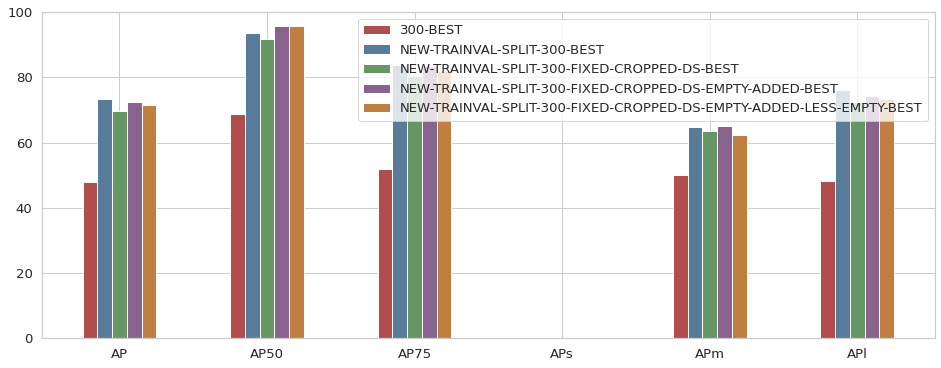

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

all_metrics = [OrderedDict(_) for _ in all_metrics]

metrics = [x for x in df.columns if 'AP' in x or 'FPS' in x]
names = [x.replace('yolov7-tiny-', '') for x in df.method.tolist()]

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.1  # the width of the bars

sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=0.5))
plt.tight_layout()

plt.figure(figsize=(16,6))
ax  = plt.gca()

rects = []
for i, r in enumerate(names):
    values = [x for x in all_metrics if x['method'].replace('yolov7-tiny-', '') == r][0]
    values_ = [v for k,v in values.items() if 'AP' in k or 'FPS' in k]
    rect = plt.bar(ind+i*width, values_, width)
    rects.append(rect)

plt.ylim([0,100])
plt.xticks(ind + 2*width, metrics, rotation=0)
plt.legend( [rect[0] for rect in rects], [_.upper() for _ in names])
# os.makedirs(f"plots/{subdir}", exist_ok=True)
# plt.savefig(f'plots/{subdir}/AP.png',bbox_inches='tight', pad_inches=0)

([<matplotlib.axis.XTick at 0x7036fc2564c0>,
 [Text(0.2, 0, 'AR1'),
  Text(1.2, 0, 'AR10'),
  Text(2.2, 0, 'AR100'),
  Text(3.2, 0, 'ARs'),
  Text(4.2, 0, 'ARm'),
  Text(5.2, 0, 'ARl')])

<Figure size 432x288 with 0 Axes>

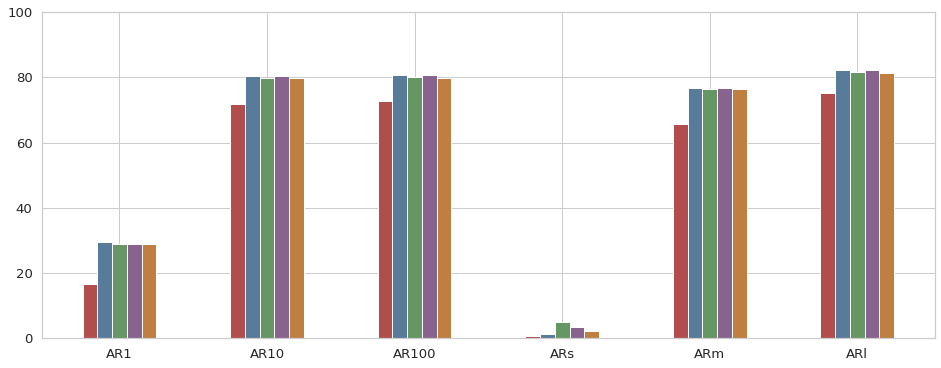

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

all_metrics = [OrderedDict(_) for _ in all_metrics]

metrics = [x for x in df.columns if 'AR' in x or 'FPS' in x]
names = df.method.tolist()

N = len(metrics)
ind = np.arange(N)  # the x locations for the groups
width = 0.1  # the width of the bars

sns.set(style = 'whitegrid', font_scale = 1.2)
sns.set_palette(sns.color_palette("Set1", desat=0.5))
plt.tight_layout()

plt.figure(figsize=(16,6))
ax  = plt.gca()

rects = []
for i, r in enumerate(names):
    values = [x for x in all_metrics if x['method'] == r][0]
    values_ = [v for k,v in values.items() if 'AR' in k or 'FPS' in k]
    rect = plt.bar(ind+i*width, values_, width)
    rects.append(rect)

plt.ylim([0,100])
plt.xticks(ind + 2*width, metrics, rotation=0)
# plt.legend( [rect[0] for rect in rects], [_.upper() for _ in names])
# plt.savefig(f'plots/{subdir}/AR.png',bbox_inches='tight', pad_inches=0)